In [15]:
import nibabel
import numpy as np
import nipraxis
import matplotlib.pyplot as plt

In [5]:
bold_fname = nipraxis.fetch_file('ds114_sub009_t2r1.nii')
bold_fname

'/home/harrison/.cache/nipraxis/0.5/ds114_sub009_t2r1.nii'

In [6]:
import nibabel as nib
img = nib.load(bold_fname)
img.shape

(64, 64, 30, 173)

In [12]:
# Number of voxels
print(np.prod(img.shape[:-1]))

# Get fmri data
data = img.get_fdata()

# Drop the first volume
data = img.get_fdata()
data = data[..., 1:]
data.shape

# First volume 
first_vol = data[..., 0]
# Take the aritmetic mean across the all voxels
np.mean(first_vol)

122880


336.69940592447915

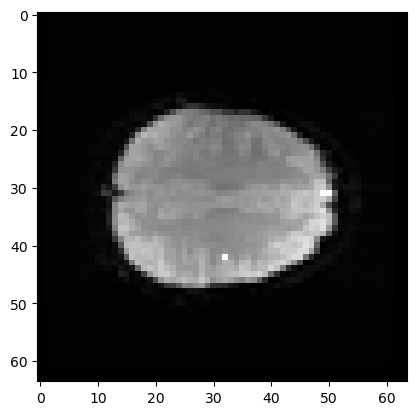

In [16]:
# Where is this in the brain?
mean_data = np.mean(data, axis=-1)
# Make a nice bright dot in the right place
mean_data[42, 32, 19] = np.max(mean_data)
plt.imshow(mean_data[:, :, 19], cmap='gray')

(172,)


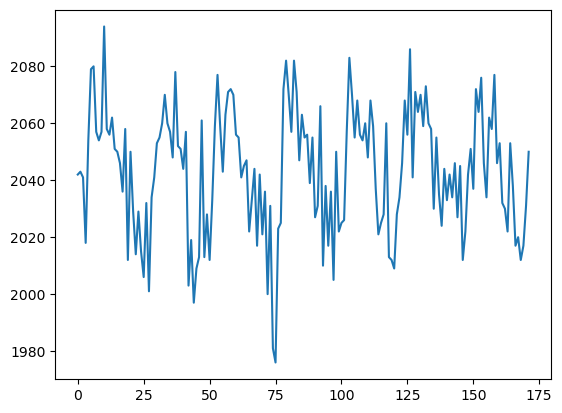

In [35]:
# This is slicing over all three of the space axes
voxel_time_course = data[42, 32, 19]
print(voxel_time_course.shape)
plt.plot(voxel_time_course);

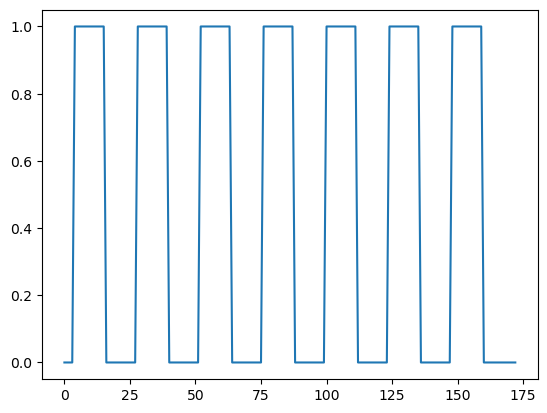

In [34]:
cond_fname = nipraxis.fetch_file('ds114_sub009_t2r1_cond.txt')
cond_fname
# Load the neural time course using pre-packaged function
from nipraxis.stimuli import events2neural
TR = 2.5  # time between volumes
n_trs = img.shape[-1]  # The original number of TRs
neural = events2neural(cond_fname, TR, n_trs)
plt.plot(neural);